###Import Module

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


###Load Data

In [ ]:
data = pd.read_csv('Frogs_MFCCs.csv')
data.head()
df = data.drop(columns=['Genus', 'Species', 'RecordID'])
#print(df['Family'].unique())
X = df.iloc[:,:-1]
#X.head()
y = df.iloc[:,-1]
classes = list(df['Family'].unique())
print(classes)
#print(classes)    # finding unique names in family class
y.head()

#Label encoding for y in dataset and find confusion matrix
class_no = list(range(len(classes)))
class_dict = {cls:index for cls, index in zip(classes, class_no)}
print(class_dict)
y = y.map(lambda x: class_dict[x])
print(y)

['Leptodactylidae', 'Dendrobatidae', 'Hylidae', 'Bufonidae']
{'Leptodactylidae': 0, 'Dendrobatidae': 1, 'Hylidae': 2, 'Bufonidae': 3}
0       0
1       0
2       0
3       0
4       0
       ..
7190    2
7191    2
7192    2
7193    2
7194    2
Name: Family, Length: 7195, dtype: int64


###Select Family in dataset and split to data and label

In [ ]:
ps = []
dfs = [df[df['Family'] == cls] for cls in classes]
Xcs = [df.iloc[:, :-1] for df in dfs]     #choose values for 4 class in family
ycs = [df.iloc[:, -1] for df in dfs]      #choose labels for 4 class in family
# print(len(Xcs[1]))
# print(Xcs[1].shape)   #(4420,22)
# print(len(ycs[1]))
# print(ycs[1].shape)   #(542)

#split dataset to train and test 
#use zip in for loop: create an iterator that produces tuples of the form (x, y)
tts = [train_test_split(X, y, test_size = 0.3, random_state = 42) for X, y in zip(Xcs, ycs)]
#tts = [Xtrain, Xtest, ytrain , ytest]
# print(len(tts[0][0]))  #3094  Xtrain for subclass1  
# print(len(tts[0][1]))  #1326  Xtest for subclass1
# print(len(tts[0][2]))  #3094  ytrain for subclass1
# print(len(tts[0][3]))  #1326  ytest for subclass1

means = [np.mean(t[0], axis=0) for t in tts]  #find mean along coloumn
#print(len(means)) # we have 4 mean for each of our class
covs = [np.cov(t[0], rowvar=False) for t in tts]    # rowvar=false:each column represents a variable, while the rows contain observations.
#print(len(covs)) # we have 4 cov for each of our class

#Initalize value 
corrects_train = [0 for i in range(len(classes))]
wrongs_train = [0 for i in range(len(classes))]
accs_train = [0 for i in range(len(classes))]
corrects_test = [0 for i in range(len(classes))]
wrongs_test = [0 for i in range(len(classes))]
accs_test = [0 for i in range(len(classes))]

for i, cls in enumerate(classes): 
  print(f'Calculating class {cls} performance...')
  Xtrain, Xtest, ytrain, ytest = list(map(np.array, tts[i]))
  ps = [[multivariate_normal.pdf(Xtrain[j], mean = means[k], cov = covs[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtrain)))]
  ps = np.argmax(ps, axis=-1)
  corrects_train[i] = len(ps[ps == i])
  wrongs_train[i] = len(ps[ps != i])
  accs_train[i] = corrects_train[i] / len(Xtrain)

  ps = [[multivariate_normal.pdf(Xtest[j], mean = means[k], cov = covs[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtest)))]
  ps = np.argmax(ps, axis=-1)
  corrects_test[i] = len(ps[ps == i])
  wrongs_test[i] = len(ps[ps != i])
  accs_test[i] = corrects_test[i] / len(Xtest)

print("\n")
print(corrects_train, wrongs_train, accs_train)
print(corrects_test, wrongs_test, accs_test)


Calculating class Leptodactylidae performance...


100%|██████████| 1326/1326 [00:02<00:00, 466.66it/s]


Calculating class Dendrobatidae performance...


100%|██████████| 163/163 [00:00<00:00, 421.56it/s]


Calculating class Hylidae performance...


100%|██████████| 650/650 [00:01<00:00, 464.79it/s]


Calculating class Bufonidae performance...


100%|██████████| 21/21 [00:00<00:00, 425.34it/s]



[3017, 372, 1444, 47] [77, 7, 71, 0] [0.9751131221719457, 0.9815303430079155, 0.9531353135313532, 1.0]
[1271, 158, 619, 16] [55, 5, 31, 5] [0.9585218702865762, 0.9693251533742331, 0.9523076923076923, 0.7619047619047619]


### Confusion Matrix

In [ ]:
Xarr = np.array(X)
ps = [[multivariate_normal.pdf(Xarr[j], mean = means[k], cov = covs[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(X)))]
ps = np.argmax(ps, axis=-1)

100%|██████████| 7195/7195 [00:14<00:00, 480.83it/s]


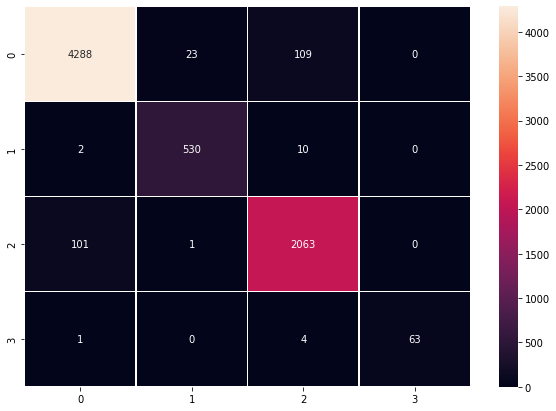

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

conf = confusion_matrix(y, ps) 
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True, fmt = "d", linewidths = 0.5)
plt.show()

###Part 2(prior knowledge)

In [ ]:
priors = [no / len(df) for no in [df['Family'].value_counts()[cls] for cls in classes]]
print(priors)

[0.6143154968728284, 0.07533009034051424, 0.30090340514246006, 0.00945100764419736]


In [ ]:
ps_prior = []
#split dataset to train and test 
#use zip in for loop: create an iterator that produces tuples of the form (x, y)
tts = [train_test_split(X, y, test_size = 0.3, random_state = 42) for X, y in zip(Xcs, ycs)]

means = [np.mean(t[0], axis=0) for t in tts]  #find mean along coloumn
#print(len(means)) # we have 4 mean for each of our class
covs = [np.cov(t[0], rowvar=False) for t in tts]    # rowvar=false:each column represents a variable, while the rows contain observations.
#print(len(covs)) # we have 4 cov for each of our class

#Initalize value 
corrects_train_prior = [0 for i in range(len(classes))]
wrongs_train_prior = [0 for i in range(len(classes))]
accs_train_prior = [0 for i in range(len(classes))]
corrects_test_prior = [0 for i in range(len(classes))]
wrongs_test_prior = [0 for i in range(len(classes))]
accs_test_prior = [0 for i in range(len(classes))]

for i, cls in enumerate(classes): 
  print(f'Calculating class {cls} performance...')
  Xtrain, Xtest, ytrain, ytest = list(map(np.array, tts[i]))
  ps_prior = [[priors[k] * multivariate_normal.pdf(Xtrain[j], mean = means[k], cov = covs[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtrain)))]
  ps_prior = np.argmax(ps_prior, axis=-1)
  corrects_train_prior[i] = len(ps_prior[ps_prior == i])
  wrongs_train_prior[i] = len(ps_prior[ps_prior != i])
  accs_train_prior[i] = corrects_train_prior[i] / len(Xtrain)

  ps_prior = [[multivariate_normal.pdf(Xtest[j], mean = means[k], cov = covs[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtest)))]
  ps_prior = np.argmax(ps_prior, axis=-1)
  corrects_test_prior[i] = len(ps_prior[ps_prior == i])
  wrongs_test_prior[i] = len(ps_prior[ps_prior != i])
  accs_test_prior[i] = corrects_test_prior[i] / len(Xtest)

print("\n")
print(corrects_train_prior, wrongs_train_prior, accs_train_prior)
print(corrects_test_prior, wrongs_test_prior, accs_test_prior)

Calculating class Leptodactylidae performance...


100%|██████████| 1326/1326 [00:03<00:00, 431.23it/s]


Calculating class Dendrobatidae performance...


100%|██████████| 163/163 [00:00<00:00, 443.87it/s]


Calculating class Hylidae performance...


100%|██████████| 650/650 [00:01<00:00, 454.52it/s]


Calculating class Bufonidae performance...


100%|██████████| 21/21 [00:00<00:00, 398.53it/s]



[3020, 370, 1433, 47] [74, 9, 82, 0] [0.9760827407886231, 0.9762532981530343, 0.9458745874587459, 1.0]
[1271, 158, 619, 16] [55, 5, 31, 5] [0.9585218702865762, 0.9693251533742331, 0.9523076923076923, 0.7619047619047619]


In [ ]:
Xarr = np.array(X)
ps_prior = [[priors[k] * multivariate_normal.pdf(Xarr[j], mean = means[k], cov = covs[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(X)))]
ps_prior = np.argmax(ps_prior, axis=-1)

100%|██████████| 7195/7195 [00:17<00:00, 410.24it/s]


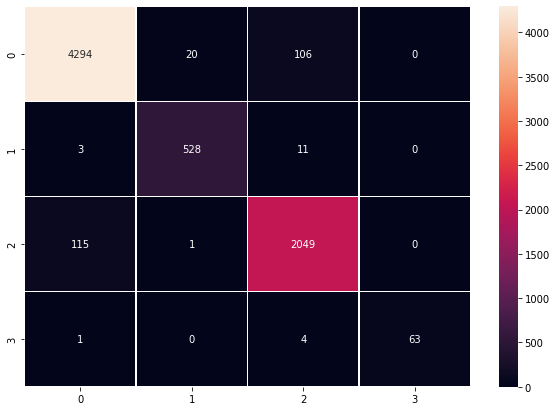

In [ ]:
conf = confusion_matrix(y, ps_prior) 
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True, fmt = "d", linewidths = 0.5)
plt.show()

###Part 3

In [ ]:
covs_arr = []
for item in range(4):
  temp = (np.diag(np.diag(np.array(covs[item]))))
  covs_arr.append(temp)

#print(covs_arr[3].shape)
covs_list = list(covs_arr)
#print(covs_list)

### Part 3 : ML

In [ ]:
ps_diagnal_ml = []
#split dataset to train and test 
#use zip in for loop: create an iterator that produces tuples of the form (x, y)
tts = [train_test_split(X, y, test_size = 0.3, random_state = 42) for X, y in zip(Xcs, ycs)]
#tts = [Xtrain, Xtest, ytrain , ytest]
# print(len(tts[0][0]))  #3094  Xtrain for subclass1  
# print(len(tts[0][1]))  #1326  Xtest for subclass1
# print(len(tts[0][2]))  #3094  ytrain for subclass1
# print(len(tts[0][3]))  #1326  ytest for subclass1

means = [np.mean(t[0], axis=0) for t in tts]  #find mean along coloumn
#print(len(means)) # we have 4 mean for each of our class

#Initalize value 
corrects_train_diagnal_ml = [0 for i in range(len(classes))]
wrongs_train_diagnal_ml = [0 for i in range(len(classes))]
accs_train_diagnal_ml = [0 for i in range(len(classes))]
corrects_test_diagnal_ml = [0 for i in range(len(classes))]
wrongs_test_diagnal_ml = [0 for i in range(len(classes))]
accs_test_diagnal_ml = [0 for i in range(len(classes))]

for i, cls in enumerate(classes): 
  print(f'Calculating class {cls} performance...')
  Xtrain, Xtest, ytrain, ytest = list(map(np.array, tts[i]))
  ps_diagnal_ml = [[multivariate_normal.pdf(Xtrain[j], mean = means[k], cov = covs_list[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtrain)))]
  ps_diagnal_ml = np.argmax(ps_diagnal_ml, axis=-1)
  corrects_train_diagnal_ml[i] = len(ps_diagnal_ml[ps_diagnal_ml == i])
  wrongs_train_diagnal_ml[i] = len(ps_diagnal_ml[ps_diagnal_ml != i])
  accs_train_diagnal_ml[i] = corrects_train_diagnal_ml[i] / len(Xtrain)

  ps_diagnal_ml = [[multivariate_normal.pdf(Xtest[j], mean = means[k], cov = covs_list[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtest)))]
  ps_diagnal_ml = np.argmax(ps_diagnal_ml, axis=-1)
  corrects_test_diagnal_ml[i] = len(ps_diagnal_ml[ps_diagnal_ml == i])
  wrongs_test_diagnal_ml[i] = len(ps_diagnal_ml[ps_diagnal_ml != i])
  accs_test_diagnal_ml[i] = corrects_test_diagnal_ml[i] / len(Xtest)

print("\n")
print(corrects_train_diagnal_ml, wrongs_train_diagnal_ml, accs_train_diagnal_ml)
print(corrects_test_diagnal_ml, wrongs_test_diagnal_ml, accs_test_diagnal_ml)

Calculating class Leptodactylidae performance...


100%|██████████| 1326/1326 [00:02<00:00, 597.82it/s]


Calculating class Dendrobatidae performance...


100%|██████████| 163/163 [00:00<00:00, 1254.83it/s]


Calculating class Hylidae performance...


100%|██████████| 650/650 [00:00<00:00, 1064.06it/s]


Calculating class Bufonidae performance...


100%|██████████| 21/21 [00:00<00:00, 1100.62it/s]



[2692, 356, 1290, 42] [402, 23, 225, 5] [0.870071105365223, 0.9393139841688655, 0.8514851485148515, 0.8936170212765957]
[1120, 156, 543, 18] [206, 7, 107, 3] [0.8446455505279035, 0.9570552147239264, 0.8353846153846154, 0.8571428571428571]


###Part 3: confusion matrix ML

In [ ]:
Xarr = np.array(X)
ps_diagnal_ml = [[multivariate_normal.pdf(Xarr[j], mean = means[k], cov = covs_list[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(X)))]
ps_diagnal_ml = np.argmax(ps_diagnal_ml, axis=-1)

100%|██████████| 7195/7195 [00:06<00:00, 1104.13it/s]


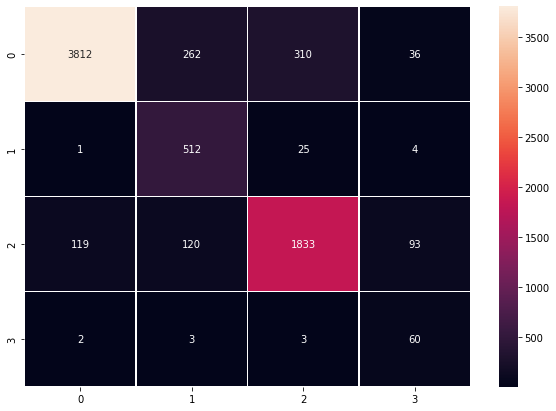

In [ ]:
conf = confusion_matrix(y, ps_diagnal_ml) 
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True, fmt = "d", linewidths = 0.5)
plt.show()

###Part3:MAP

In [ ]:
ps_diagnal_map = []
#split dataset to train and test 
#use zip in for loop: create an iterator that produces tuples of the form (x, y)
tts = [train_test_split(X, y, test_size = 0.3, random_state = 42) for X, y in zip(Xcs, ycs)]

means = [np.mean(t[0], axis=0) for t in tts]  #find mean along coloumn
#print(len(means)) # we have 4 mean for each of our class

#Initalize value 
corrects_train_diagnal_map = [0 for i in range(len(classes))]
wrongs_train_diagnal_map = [0 for i in range(len(classes))]
accs_train_diagnal_map = [0 for i in range(len(classes))]
corrects_test_diagnal_map = [0 for i in range(len(classes))]
wrongs_test_diagnal_map = [0 for i in range(len(classes))]
accs_test_diagnal_map = [0 for i in range(len(classes))]

for i, cls in enumerate(classes): 
  print(f'Calculating class {cls} performance...')
  Xtrain, Xtest, ytrain, ytest = list(map(np.array, tts[i]))
  ps_diagnal_map = [[priors[k] * multivariate_normal.pdf(Xtrain[j], mean = means[k], cov = covs_list[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtrain)))]
  ps_diagnal_map = np.argmax(ps_diagnal_map, axis=-1)
  corrects_train_diagnal_map[i] = len(ps_diagnal_map[ps_diagnal_map == i])
  wrongs_train_diagnal_map[i] = len(ps_diagnal_map[ps_diagnal_map != i])
  accs_train_diagnal_map[i] = corrects_train_diagnal_map[i] / len(Xtrain)

  ps_diagnal_map = [[multivariate_normal.pdf(Xtest[j], mean = means[k], cov = covs_list[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtest)))]
  ps_diagnal_map = np.argmax(ps_diagnal_map, axis=-1)
  corrects_test_diagnal_map[i] = len(ps_diagnal_map[ps_diagnal_map == i])
  wrongs_test_diagnal_map[i] = len(ps_diagnal_map[ps_diagnal_map != i])
  accs_test_diagnal_map[i] = corrects_test_diagnal_map[i] / len(Xtest)

print("\n")
print(corrects_train_diagnal_map, wrongs_train_diagnal_map, accs_train_diagnal_map)
print(corrects_test_diagnal_map, wrongs_test_diagnal_map, accs_test_diagnal_map)

Calculating class Leptodactylidae performance...


100%|██████████| 1326/1326 [00:01<00:00, 1057.14it/s]


Calculating class Dendrobatidae performance...


100%|██████████| 163/163 [00:00<00:00, 930.39it/s]


Calculating class Hylidae performance...


100%|██████████| 650/650 [00:00<00:00, 1243.44it/s]


Calculating class Bufonidae performance...


100%|██████████| 21/21 [00:00<00:00, 1221.13it/s]



[2737, 336, 1332, 41] [357, 43, 183, 6] [0.8846153846153846, 0.8865435356200527, 0.8792079207920792, 0.8723404255319149]
[1120, 156, 543, 18] [206, 7, 107, 3] [0.8446455505279035, 0.9570552147239264, 0.8353846153846154, 0.8571428571428571]


100%|██████████| 7195/7195 [00:07<00:00, 943.92it/s]


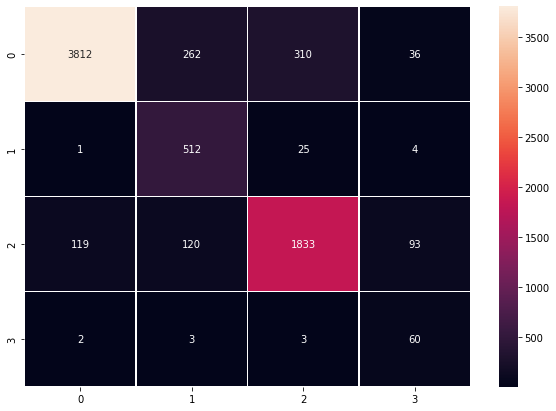

In [ ]:
Xarr = np.array(X)
ps_diagnal_map = [[multivariate_normal.pdf(Xarr[j], mean = means[k], cov = covs_list[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(X)))]
ps_diagnal_map = np.argmax(ps_diagnal_map, axis=-1)
conf = confusion_matrix(y, ps_diagnal_map) 
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True, fmt = "d", linewidths = 0.5)
plt.show()

### part4 : Kfolds

###part4: Kfolds ML

In [ ]:
n_folds =  4
ps_nfold = []
#split dataset to train and test 
#use zip in for loop: create an iterator that produces tuples of the form (x, y)
tts = [train_test_split(X, y, test_size = 1/n_folds, random_state = 42) for X, y in zip(Xcs, ycs)]
#tts = [Xtrain, Xtest, ytrain , ytest]


means_nfolds = [np.mean(t[0], axis=0) for t in tts]  #find mean along coloumn
#print(len(means)) # we have 4 mean for each of our class
covs_nfolds = [np.cov(t[0], rowvar=False) for t in tts]    # rowvar=false:each column represents a variable, while the rows contain observations.
#print(len(covs)) # we have 4 cov for each of our class

#Initalize value 
corrects_train_nfold = [0 for i in range(len(classes))]
wrongs_train_nfold = [0 for i in range(len(classes))]
accs_train_nfold = [0 for i in range(len(classes))]
corrects_test_nfold = [0 for i in range(len(classes))]
wrongs_test_nfold = [0 for i in range(len(classes))]
accs_test_nfold = [0 for i in range(len(classes))]

for i, cls in enumerate(classes): 
  print(f'Calculating class {cls} performance...')
  Xtrain, Xtest, ytrain, ytest = list(map(np.array, tts[i]))
  ps_nfold = [[multivariate_normal.pdf(Xtrain[j], mean = means_nfolds[k], cov = covs_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtrain)))]
  ps_nfold = np.argmax(ps_nfold, axis=-1)
  corrects_train_nfold[i] = len(ps_nfold[ps_nfold == i])
  wrongs_train_nfold[i] = len(ps_nfold[ps_nfold != i])
  accs_train_nfold[i] = corrects_train_nfold[i] / len(Xtrain)

  ps_nfold = [[multivariate_normal.pdf(Xtest[j], mean = means_nfolds[k], cov = covs_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtest)))]
  ps_nfold = np.argmax(ps_nfold, axis=-1)
  corrects_test_nfold[i] = len(ps_nfold[ps_nfold == i])
  wrongs_test_nfold[i] = len(ps_nfold[ps_nfold != i])
  accs_test_nfold[i] = corrects_test_nfold[i] / len(Xtest)

print("\n")
print(corrects_train_nfold, wrongs_train_nfold, accs_train_nfold)
print(corrects_test_nfold, wrongs_test_nfold, accs_test_nfold)

Calculating class Leptodactylidae performance...


100%|██████████| 1105/1105 [00:02<00:00, 491.68it/s]


Calculating class Dendrobatidae performance...


100%|██████████| 136/136 [00:00<00:00, 552.33it/s]


Calculating class Hylidae performance...


100%|██████████| 542/542 [00:01<00:00, 423.72it/s]


Calculating class Bufonidae performance...


100%|██████████| 17/17 [00:00<00:00, 401.36it/s]



[3231, 398, 1548, 51] [84, 8, 75, 0] [0.9746606334841629, 0.9802955665024631, 0.9537892791127541, 1.0]
[1055, 131, 515, 14] [50, 5, 27, 3] [0.9547511312217195, 0.9632352941176471, 0.9501845018450185, 0.8235294117647058]


###part4:Kfolds ML Confusion matrix

100%|██████████| 7195/7195 [00:14<00:00, 511.71it/s]


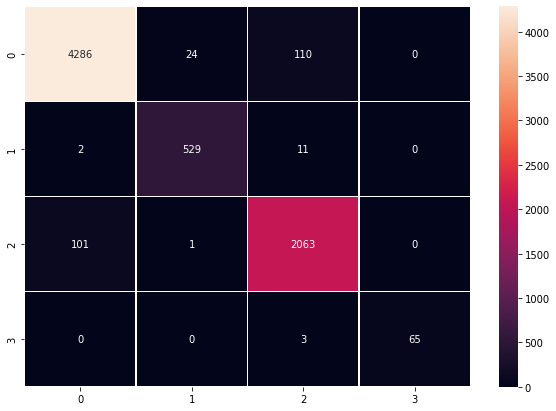

In [ ]:
Xarr = np.array(X)
ps_nfold = [[multivariate_normal.pdf(Xarr[j], mean = means_nfolds[k], cov = covs_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(X)))]
ps_nfold = np.argmax(ps_nfold, axis=-1)

conf = confusion_matrix(y, ps_nfold) 
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True, fmt = "d", linewidths = 0.5)
plt.show()

###Part4 : Kfolds MAP

In [ ]:
ps_nfolds_map = []
# dfs = [df[df['Family'] == cls] for cls in classes]
# Xcs = [df.iloc[:, :-1] for df in dfs]     #choose values for 4 class in family
# ycs = [df.iloc[:, -1] for df in dfs]      #choose labels for 4 class in family

#split dataset to train and test 
#use zip in for loop: create an iterator that produces tuples of the form (x, y)
tts = [train_test_split(X, y, test_size = 1/n_folds, random_state = 42) for X, y in zip(Xcs, ycs)]

means_nfolds = [np.mean(t[0], axis=0) for t in tts]  #find mean along coloumn
#print(len(means)) # we have 4 mean for each of our class
covs_nfolds = [np.cov(t[0], rowvar=False) for t in tts]    # rowvar=false:each column represents a variable, while the rows contain observations.
#print(len(covs)) # we have 4 cov for each of our class

#Initalize value 
corrects_train_nfolds_map = [0 for i in range(len(classes))]
wrongs_train_nfolds_map = [0 for i in range(len(classes))]
accs_train_nfolds_map = [0 for i in range(len(classes))]
corrects_test_nfolds_map = [0 for i in range(len(classes))]
wrongs_test_nfolds_map = [0 for i in range(len(classes))]
accs_test_nfolds_map = [0 for i in range(len(classes))]

for i, cls in enumerate(classes): 
  print(f'Calculating class {cls} performance...')
  Xtrain, Xtest, ytrain, ytest = list(map(np.array, tts[i]))
  ps_nfolds_map = [[priors[k] * multivariate_normal.pdf(Xtrain[j], mean = means_nfolds[k], cov = covs_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtrain)))]
  ps_nfolds_map = np.argmax(ps_nfolds_map, axis=-1)
  corrects_train_nfolds_map[i] = len(ps_nfolds_map[ps_nfolds_map == i])
  wrongs_train_nfolds_map[i] = len(ps_nfolds_map[ps_nfolds_map != i])
  accs_train_nfolds_map[i] = corrects_train_nfolds_map[i] / len(Xtrain)

  ps_nfolds_map = [[multivariate_normal.pdf(Xtest[j], mean = means_nfolds[k], cov = covs_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtest)))]
  ps_nfolds_map = np.argmax(ps_nfolds_map, axis=-1)
  corrects_test_nfolds_map[i] = len(ps_nfolds_map[ps_nfolds_map == i])
  wrongs_test_nfolds_map[i] = len(ps_nfolds_map[ps_nfolds_map != i])
  accs_test_nfolds_map[i] = corrects_test_nfolds_map[i] / len(Xtest)

print("\n")
print(corrects_train_nfolds_map, wrongs_train_nfolds_map, accs_train_nfolds_map)
print(corrects_test_nfolds_map, wrongs_test_nfolds_map, accs_test_nfolds_map)

Calculating class Leptodactylidae performance...


100%|██████████| 1105/1105 [00:02<00:00, 493.44it/s]


Calculating class Dendrobatidae performance...


100%|██████████| 136/136 [00:00<00:00, 526.38it/s]


Calculating class Hylidae performance...


100%|██████████| 542/542 [00:00<00:00, 549.71it/s]


Calculating class Bufonidae performance...


100%|██████████| 17/17 [00:00<00:00, 469.26it/s]



[3236, 395, 1534, 51] [79, 11, 89, 0] [0.9761689291101056, 0.9729064039408867, 0.9451632778804683, 1.0]
[1055, 131, 515, 14] [50, 5, 27, 3] [0.9547511312217195, 0.9632352941176471, 0.9501845018450185, 0.8235294117647058]


100%|██████████| 7195/7195 [00:31<00:00, 228.77it/s]


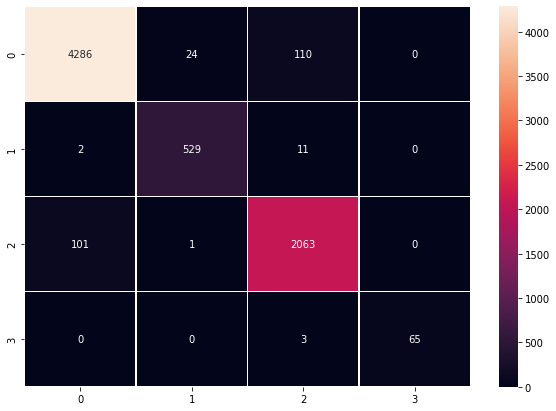

In [ ]:
Xarr = np.array(X)
ps_nfolds_map = [[multivariate_normal.pdf(Xarr[j], mean = means_nfolds[k], cov = covs_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(X)))]
ps_nfolds_map = np.argmax(ps_nfolds_map, axis=-1)

conf = confusion_matrix(y, ps_nfolds_map) 
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True, fmt = "d", linewidths = 0.5)
plt.show()

###Part4 : Kfolds ML diagnal covariance

In [ ]:
covs_arr_nfolds = []
for item in range(4):
  temp = (np.diag(np.diag(np.array(covs_nfolds[item]))))
  covs_arr_nfolds.append(temp)

#print(covs_arr[3].shape)
covs_list_nfolds = list(covs_arr_nfolds)
#print(covs_list)

In [ ]:
ps_diagnal_nfolds = []
#split dataset to train and test 
#use zip in for loop: create an iterator that produces tuples of the form (x, y)
tts = [train_test_split(X, y, test_size =1/n_folds, random_state = 42) for X, y in zip(Xcs, ycs)]

means_nfolds = [np.mean(t[0], axis=0) for t in tts]  #find mean along coloumn
#print(len(means)) # we have 4 mean for each of our class

#Initalize value 
corrects_train_diagnal_nfolds = [0 for i in range(len(classes))]
wrongs_train_diagnal_nfolds = [0 for i in range(len(classes))]
accs_train_diagnal_nfolds = [0 for i in range(len(classes))]
corrects_test_diagnal_nfolds = [0 for i in range(len(classes))]
wrongs_test_diagnal_nfolds = [0 for i in range(len(classes))]
accs_test_diagnal_nfolds = [0 for i in range(len(classes))]

for i, cls in enumerate(classes): 
  print(f'Calculating class {cls} performance...')
  Xtrain, Xtest, ytrain, ytest = list(map(np.array, tts[i]))
  ps_diagnal_nfolds = [[multivariate_normal.pdf(Xtrain[j], mean = means_nfolds[k], cov = covs_list_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtrain)))]
  ps_diagnal_nfolds = np.argmax(ps_diagnal_nfolds, axis=-1)
  corrects_train_diagnal_nfolds[i] = len(ps_diagnal_nfolds[ps_diagnal_nfolds == i])
  wrongs_train_diagnal_nfolds[i] = len(ps_diagnal_nfolds[ps_diagnal_nfolds != i])
  accs_train_diagnal_nfolds[i] = corrects_train_diagnal_nfolds[i] / len(Xtrain)

  ps_diagnal_nfolds = [[multivariate_normal.pdf(Xtest[j], mean = means_nfolds[k], cov = covs_list_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtest)))]
  ps_diagnal_nfolds = np.argmax(ps_diagnal_nfolds, axis=-1)
  corrects_test_diagnal_nfolds[i] = len(ps_diagnal_nfolds[ps_diagnal_nfolds == i])
  wrongs_test_diagnal_nfolds[i] = len(ps_diagnal_nfolds[ps_diagnal_nfolds != i])
  accs_test_diagnal_nfolds[i] = corrects_test_diagnal_nfolds[i] / len(Xtest)

print("\n")
print(corrects_train_diagnal_nfolds, wrongs_train_diagnal_nfolds, accs_train_diagnal_nfolds)
print(corrects_test_diagnal_nfolds, wrongs_test_diagnal_nfolds, accs_test_diagnal_nfolds)

Calculating class Leptodactylidae performance...


100%|██████████| 1105/1105 [00:01<00:00, 620.94it/s]


Calculating class Dendrobatidae performance...


100%|██████████| 136/136 [00:00<00:00, 784.61it/s]


Calculating class Hylidae performance...


100%|██████████| 542/542 [00:01<00:00, 520.65it/s]


Calculating class Bufonidae performance...


100%|██████████| 17/17 [00:00<00:00, 637.18it/s]



[2864, 385, 1364, 45] [451, 21, 259, 6] [0.8639517345399699, 0.9482758620689655, 0.8404189772027111, 0.8823529411764706]
[921, 130, 446, 15] [184, 6, 96, 2] [0.8334841628959276, 0.9558823529411765, 0.8228782287822878, 0.8823529411764706]


100%|██████████| 7195/7195 [00:14<00:00, 494.37it/s] 


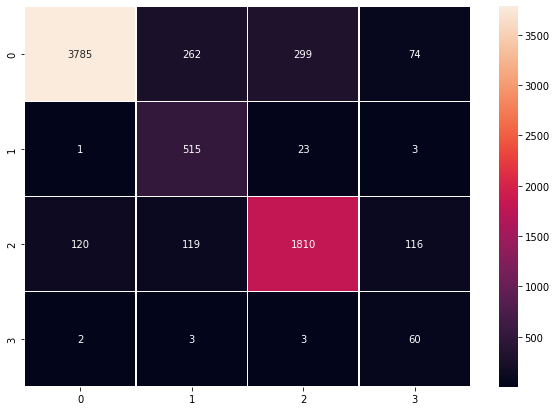

In [ ]:
Xarr = np.array(X)
ps_diagnal_nfolds = [[multivariate_normal.pdf(Xarr[j], mean = means_nfolds[k], cov = covs_list_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(X)))]
ps_diagnal_nfolds = np.argmax(ps_diagnal_nfolds, axis=-1)

conf = confusion_matrix(y, ps_diagnal_nfolds) 
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True, fmt = "d", linewidths = 0.5)
plt.show()

###Part4 : Kfolds Map dignal covariance 

In [ ]:
ps_nfolds_map = []
#split dataset to train and test 
#use zip in for loop: create an iterator that produces tuples of the form (x, y)
tts = [train_test_split(X, y, test_size = 0.3, random_state = 42) for X, y in zip(Xcs, ycs)]

means_nfolds = [np.mean(t[0], axis=0) for t in tts]  #find mean along coloumn
#print(len(means)) # we have 4 mean for each of our class

#Initalize value 
corrects_train_map_diagnal_nfolds = [0 for i in range(len(classes))]
wrongs_train_map_diagnal_nfolds = [0 for i in range(len(classes))]
accs_train_map_diagnal_nfolds = [0 for i in range(len(classes))]
corrects_test_map_diagnal_nfolds = [0 for i in range(len(classes))]
wrongs_test_map_diagnal_nfolds = [0 for i in range(len(classes))]
accs_test_map_diagnal_nfolds= [0 for i in range(len(classes))]

for i, cls in enumerate(classes): 
  print(f'Calculating class {cls} performance...')
  Xtrain, Xtest, ytrain, ytest = list(map(np.array, tts[i]))
  ps_nfolds_map = [[priors[k] * multivariate_normal.pdf(Xtrain[j], mean = means_nfolds[k], cov =  covs_list_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtrain)))]
  ps_nfolds_map = np.argmax(ps_nfolds_map, axis=-1)
  corrects_train_map_diagnal_nfolds[i] = len(ps_nfolds_map[ps_nfolds_map == i])
  wrongs_train_map_diagnal_nfolds[i] = len(ps_nfolds_map[ps_nfolds_map != i])
  accs_train_map_diagnal_nfolds[i] = corrects_train_map_diagnal_nfolds[i] / len(Xtrain)

  ps_nfolds_map = [[multivariate_normal.pdf(Xtest[j], mean = means_nfolds[k], cov = covs_list_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtest)))]
  ps_nfolds_map = np.argmax(ps_nfolds_map, axis=-1)
  corrects_test_map_diagnal_nfolds[i] = len(ps_nfolds_map[ps_nfolds_map == i])
  wrongs_test_map_diagnal_nfolds[i] = len(ps_nfolds_map[ps_nfolds_map != i])
  accs_test_map_diagnal_nfolds[i] = corrects_test_map_diagnal_nfolds[i] / len(Xtest)

print("\n")
print(corrects_train_map_diagnal_nfolds, wrongs_train_map_diagnal_nfolds, accs_train_map_diagnal_nfolds)
print(corrects_test_map_diagnal_nfolds, wrongs_test_map_diagnal_nfolds, accs_test_map_diagnal_nfolds)

Calculating class Leptodactylidae performance...


100%|██████████| 1326/1326 [00:01<00:00, 1322.33it/s]


Calculating class Dendrobatidae performance...


100%|██████████| 163/163 [00:00<00:00, 1253.23it/s]


Calculating class Hylidae performance...


100%|██████████| 650/650 [00:00<00:00, 998.25it/s]


Calculating class Bufonidae performance...


100%|██████████| 21/21 [00:00<00:00, 844.47it/s]



[2730, 336, 1331, 42] [364, 43, 184, 5] [0.8823529411764706, 0.8865435356200527, 0.8785478547854786, 0.8936170212765957]
[1117, 156, 531, 18] [209, 7, 119, 3] [0.8423831070889894, 0.9570552147239264, 0.816923076923077, 0.8571428571428571]


100%|██████████| 7195/7195 [00:06<00:00, 1131.49it/s]


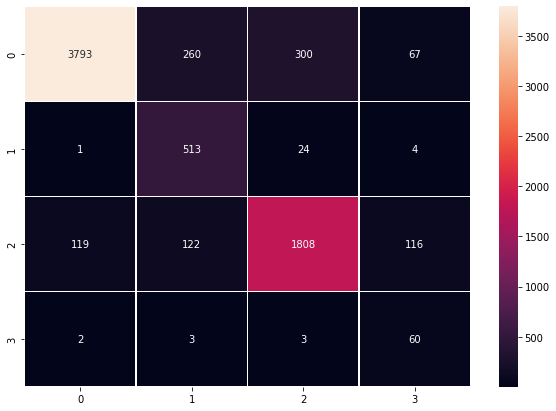

In [ ]:
Xarr = np.array(X)
ps_nfolds_map = [[multivariate_normal.pdf(Xarr[j], mean = means_nfolds[k], cov = covs_list_nfolds[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(X)))]
ps_nfolds_map = np.argmax(ps_nfolds_map, axis=-1)

conf = confusion_matrix(y, ps_nfolds_map) 
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True, fmt = "d", linewidths = 0.5)
plt.show()